In [4]:
import xarray as xr
import pandas as pd
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.cm as cm
import cmocean.cm as cmo
import intake

In [2]:
from dask.distributed import Client
import dask
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

client = Client(n_workers=10, threads_per_worker=1, memory_limit='20GB')

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Workers: 10
Total threads: 10,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37325,Workers: 10
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Total threads: 10
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:36227,Total threads: 1
Dashboard: /user/a270088/levante-spawner-preset//proxy/40551/status,Memory: 18.63 GiB
Nanny: tcp://127.0.0.1:34197,


In [5]:
cat = intake.open_catalog("../catalog.yaml")

In [6]:
run = cat.IFS["tco2559-ng5"]

In [14]:
data = run.interpolated_global.to_dask()

## [OLD, not needed anymore] Open interpolated data for IFS 2t 

In [8]:
# data_path = "/work/ab0995/a270088/NextGems_public/appetizer/IFS2.5/2t/netcdf/"

### [OLD, not needed anymore] Fast version, if you have index

In [9]:
# data = xr.open_zarr("reference::/work/ab0995/a270088/NextGems_public/appetizer/IFS2.5/2t/netcdf/tco3999-ng5_pc_2t.json", consolidated=False)

### [OLD, not needed anymore] Slow version, if index is not available

In [10]:
# data = xr.open_mfdataset('/work/ab0995/a270088/NextGems_public/appetizer/IFS2.5/2t/netcdf/tco3999-ng5_pc_2t_*.nc', 
#                          decode_cf=False,
#                          combine='nested',
#                          concat_dim ='time', 
#                          chunks={'time':1}
#                         )

In [11]:
# time = pd.date_range('2020-01-20 00:00', '2020-03-01 00:00', freq='H')

In [12]:
# data = data.assign_coords({'time':time})

In [15]:
data

<xarray.Dataset>
Dimensions:    (time: 8329, lat: 2700, lon: 5400)
Coordinates:
  * lat        (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-20 ... 2021-01-01
Data variables:
    2t         (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
    2d         (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
    lcc        (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
    10u        (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
    10v        (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
Attributes:
    interpolation:  nearest neighbour
    resolution:     tco2559-ng5

## Looking at the data

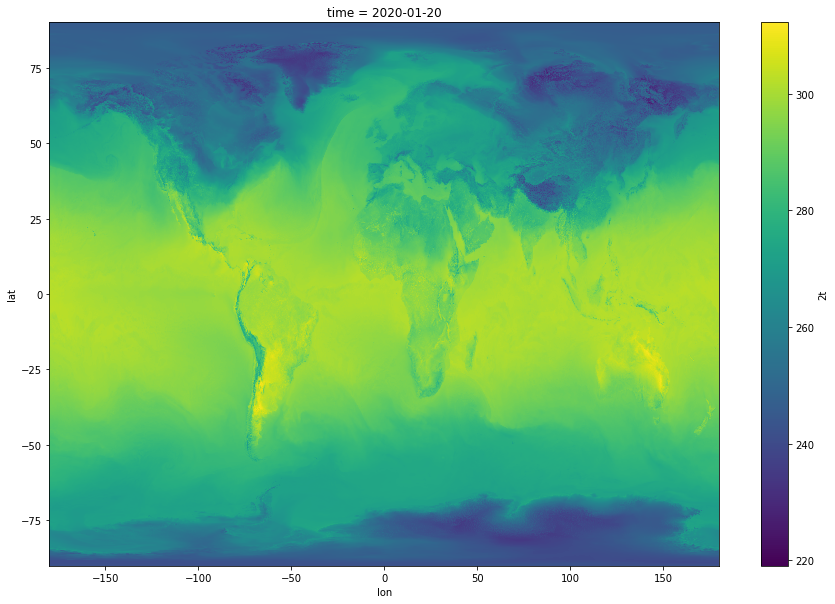

In [16]:
data['2t'][0,:,:].plot(figsize=(15,10))

(-0.5, 5399.5, 2699.5, -0.5)

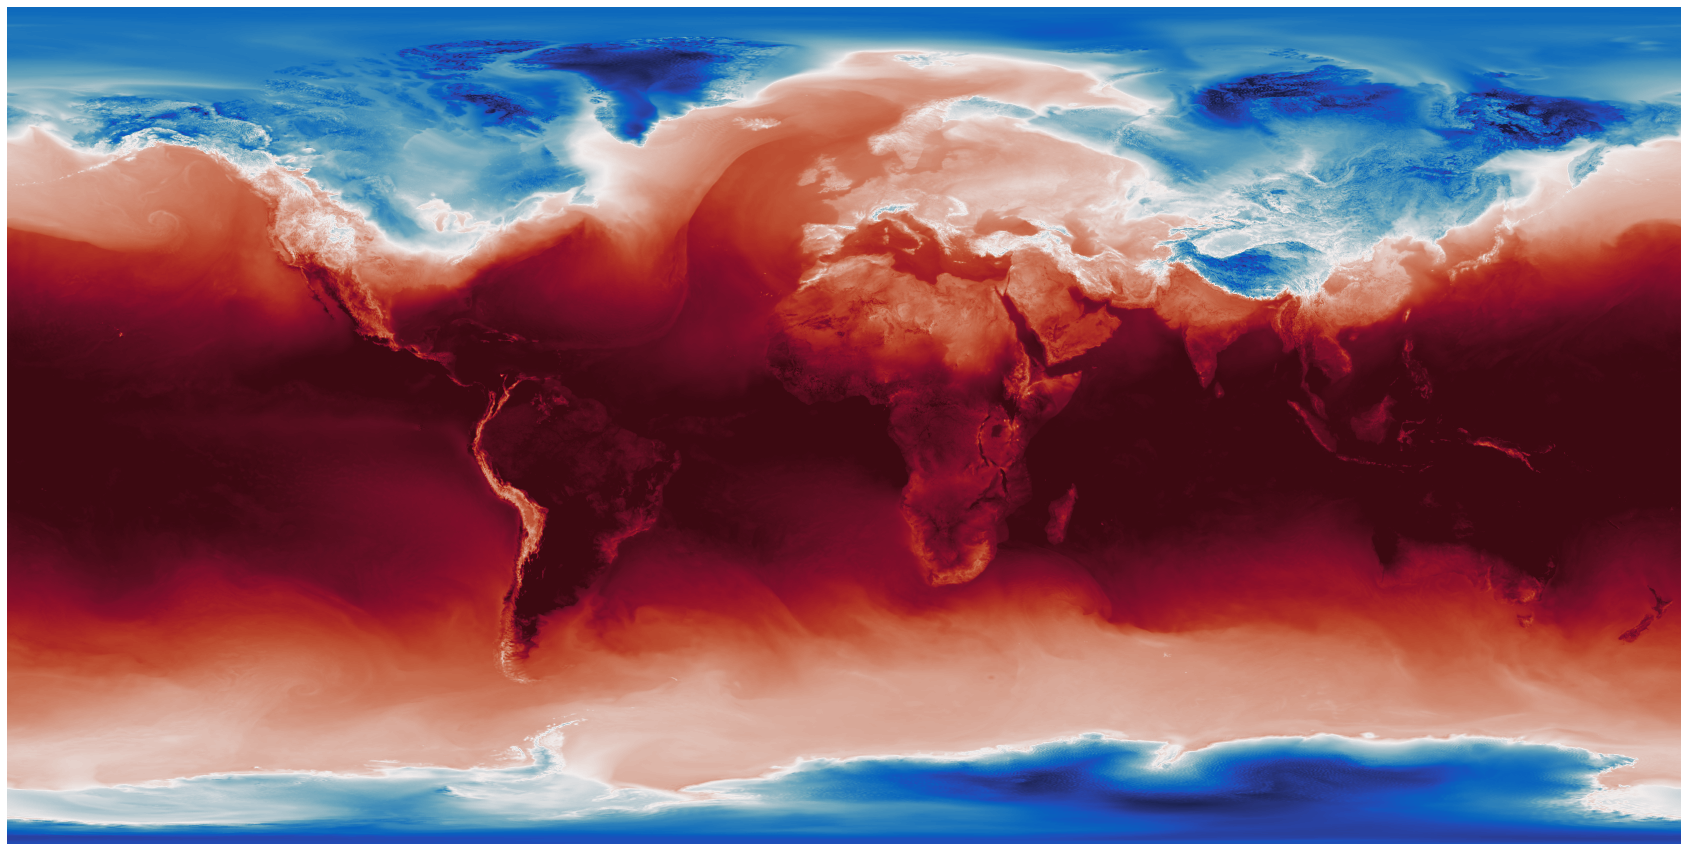

In [17]:
plt.figure(figsize=(30,30))
plt.imshow(np.flipud(data['2t'][0,:,:].values), cmap=cmo.balance, vmin=233, vmax=300)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

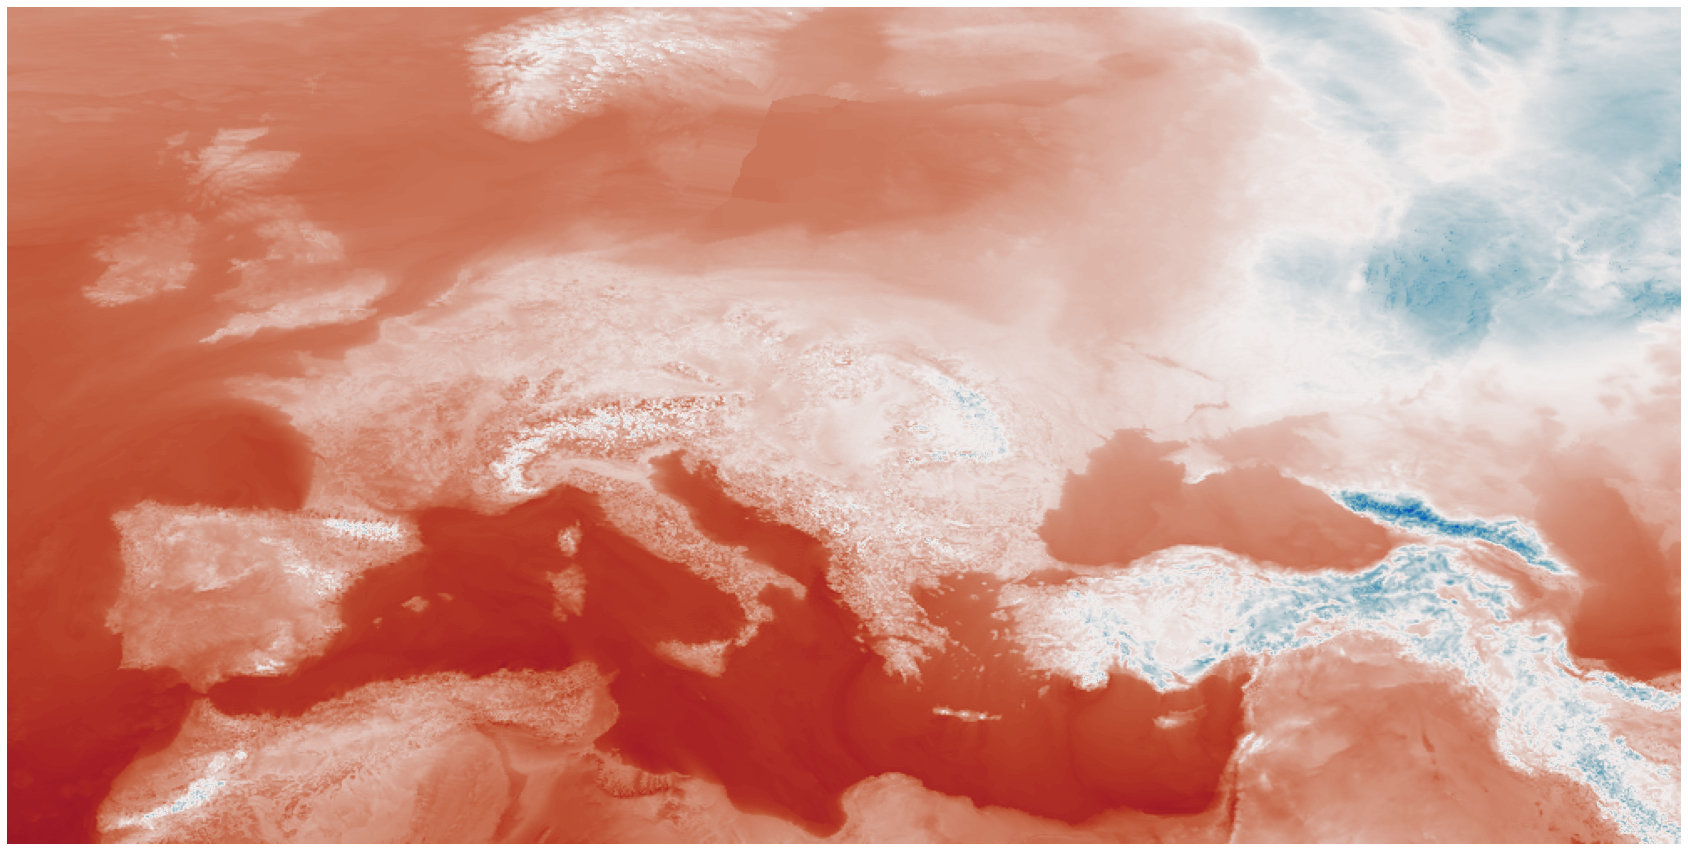

In [23]:
plt.figure(figsize=(30,30))
plt.imshow(np.flipud(data['2t'][100,1800:2300,2500:3500].values), cmap=cmo.balance, vmin=233, vmax=300)
plt.axis('off')

## Compute mean for February 

In [24]:
data.sel(time='2020-02')

<xarray.Dataset>
Dimensions:    (time: 696, lat: 2700, lon: 5400)
Coordinates:
  * lat        (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-02-01 ... 2020-02-29T23:00:00
Data variables:
    2t         (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
    2d         (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
    lcc        (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
    10u        (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
    10v        (time, lat, lon) float32 dask.array<chunksize=(1, 1350, 2700), meta=np.ndarray>
Attributes:
    interpolation:  nearest neighbour
    resolution:     tco2559-ng5

In [27]:
time_mean = data['2t'].sel(time='2020-02').mean(dim='time').compute()

In [28]:
time_mean

<xarray.DataArray '2t' (lat: 2700, lon: 5400)>
array([[234.21703, 234.21703, 234.21703, ..., 234.23752, 234.23752,
        234.23752],
       [234.26587, 234.26587, 234.26587, ..., 234.3213 , 234.3213 ,
        234.26587],
       [234.54535, 234.54535, 234.54535, ..., 234.64247, 234.64247,
        234.54535],
       ...,
       [246.80455, 246.81421, 246.81421, ..., 246.80455, 246.80455,
        246.80455],
       [246.7786 , 246.7786 , 246.7786 , ..., 246.77626, 246.77626,
        246.77626],
       [246.77626, 246.77626, 246.77626, ..., 246.77626, 246.77626,
        246.77626]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0

(-0.5, 5399.5, 2699.5, -0.5)

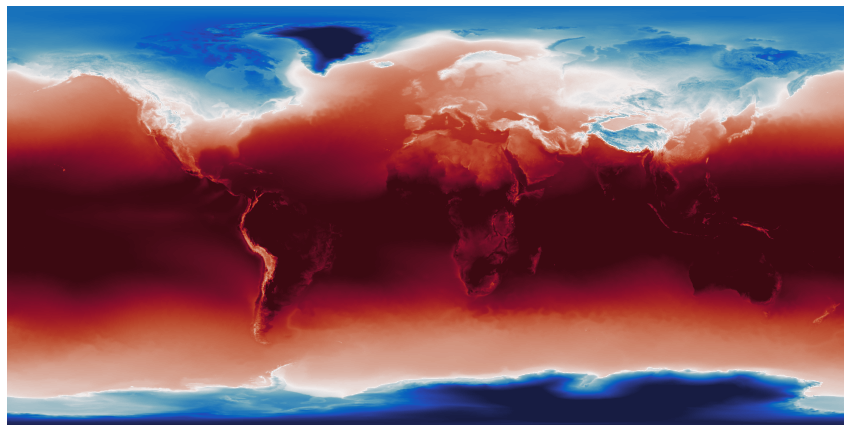

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(time_mean[:,:].values), cmap=cmo.balance, vmin=233, vmax=300)
plt.axis('off')

In [31]:
time_mean

<xarray.DataArray '2t' (lat: 2700, lon: 5400)>
array([[234.21703, 234.21703, 234.21703, ..., 234.23752, 234.23752,
        234.23752],
       [234.26587, 234.26587, 234.26587, ..., 234.3213 , 234.3213 ,
        234.26587],
       [234.54535, 234.54535, 234.54535, ..., 234.64247, 234.64247,
        234.54535],
       ...,
       [246.80455, 246.81421, 246.81421, ..., 246.80455, 246.80455,
        246.80455],
       [246.7786 , 246.7786 , 246.7786 , ..., 246.77626, 246.77626,
        246.77626],
       [246.77626, 246.77626, 246.77626, ..., 246.77626, 246.77626,
        246.77626]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0

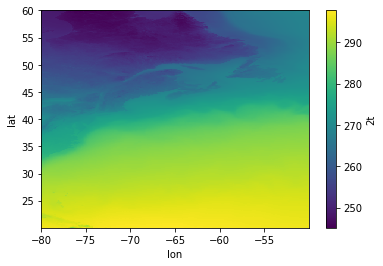

In [32]:
time_mean.sel(lon=slice(-80, -50), lat=slice(20, 60)).plot()

In [33]:
data_cut = time_mean.sel(lon=slice(-80, -50), lat=slice(20, 60))

In [34]:
time_mean.lon

<xarray.DataArray 'lon' (lon: 5400)>
array([-180.      , -179.933321, -179.866642, ...,  179.866642,  179.933321,
        180.      ])
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0

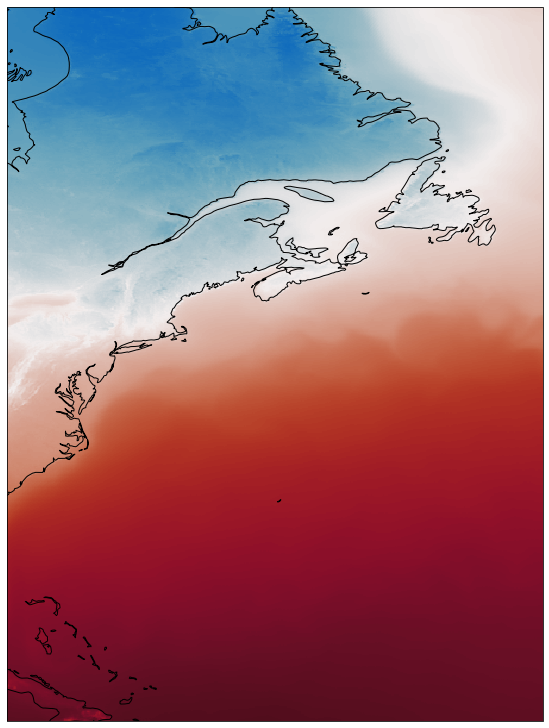

In [35]:
fig, ax = plt.subplots(
    1,1,
    subplot_kw=dict(projection=ccrs.PlateCarree()),
    constrained_layout=True,
    figsize=(15,10),
)
ax.set_extent([-80, -50, 20, 60], crs=ccrs.PlateCarree())
image = ax.pcolormesh(
                data_cut.lon,
                data_cut.lat,
                data_cut.values,
                vmin=233,
                vmax=300,
                transform=ccrs.PlateCarree(),
                cmap=cmo.balance,
            )
ax.coastlines('50m')